In [68]:
import pandas as pd
import datetime as dt
import pandasql as ps
import os
import zipfile as zp
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib

DIR=r'C:\Users\anuj\Downloads'
ZIp='archive (8).zip'

os.chdir(DIR)
zf = zp.ZipFile(f'{ZIp}')

dfs={}
for name in zf.namelist():
    df_name= name.replace('.csv','')
    dfs[df_name]=pd.read_csv(zf.open(name,mode='r'),encoding='latin')

df=dfs['LS_2.0']
df.columns=df.columns.str.replace(' ','_')
df.columns=df.columns.str.replace('\n','_')
df['LIABILITIES']=df['LIABILITIES'].astype(str).apply(lambda x: x.replace('\n','-'))
df['ASSETS']=df['ASSETS'].astype(str).apply(lambda x: x.replace('\n','-'))
df['CRIMINAL_CASES']=df['CRIMINAL_CASES'].astype(str).apply(lambda x: x.replace('Not Available','0'))
df['CRIMINAL_CASES']=df['CRIMINAL_CASES'].apply(lambda x: float(x))

### Null and Duplicate Checks

In [ ]:
df[df.duplicated()]## Check duplicates
df.isnull().values.any() ########Check NUlls
df.isnull().isnull().sum() ########Check NUlls by each column

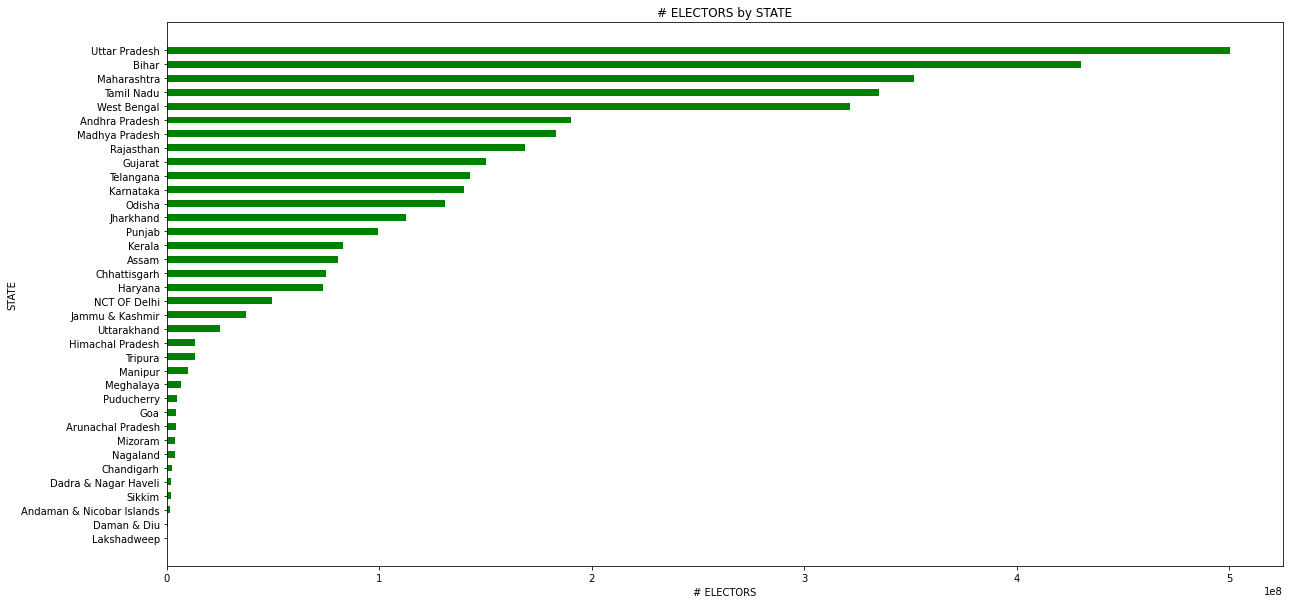

In [44]:
electors=pd.DataFrame(df['TOTAL_ELECTORS'].groupby(df['STATE']).sum()).sort_values(by='TOTAL_ELECTORS',ascending=True)
electors['STATE']=electors.index
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.barh(y=electors['STATE'].to_list(),width=electors['TOTAL_ELECTORS'].to_list(),height=0.5,color='green')
plt.title('# ELECTORS by STATE')
plt.ylabel('STATE')
plt.xlabel('# ELECTORS')
plt.show()

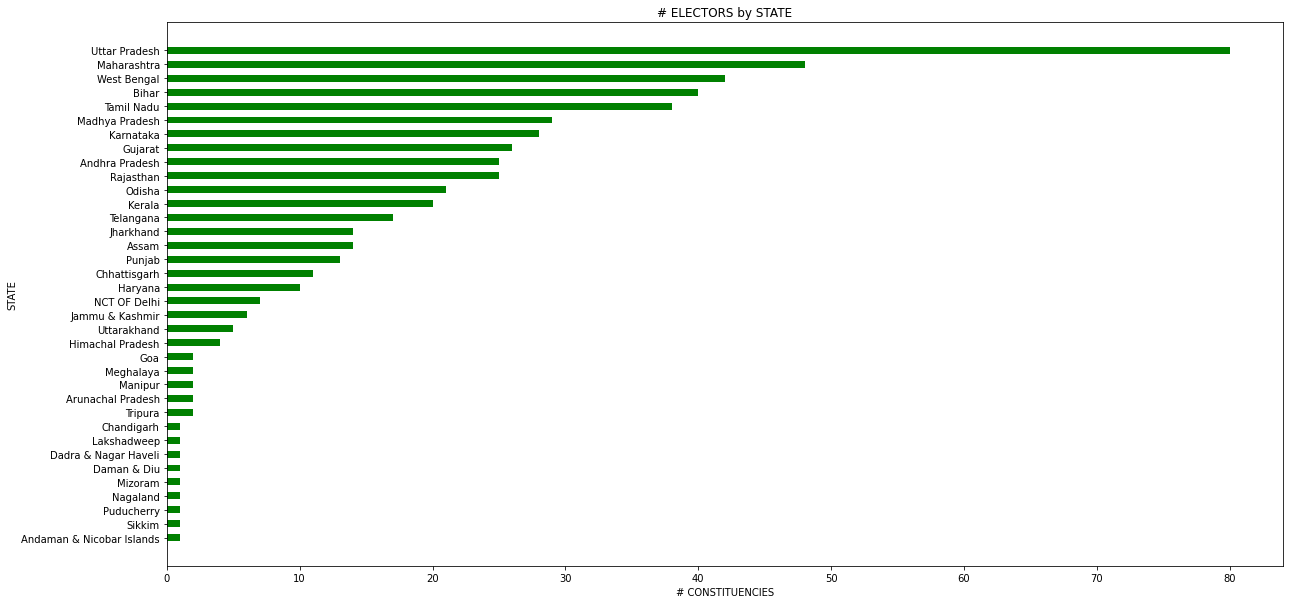

In [57]:
const=pd.DataFrame(df['CONSTITUENCY'].groupby(df['STATE']).nunique()).sort_values(by='CONSTITUENCY',ascending=True)
const['STATE']=const.index
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.barh(y=const['STATE'].to_list(),width=const['CONSTITUENCY'].to_list(),height=0.5,color='green')
plt.title('# ELECTORS by STATE')
plt.ylabel('STATE')
plt.xlabel('# CONSTITUENCIES')
plt.show()

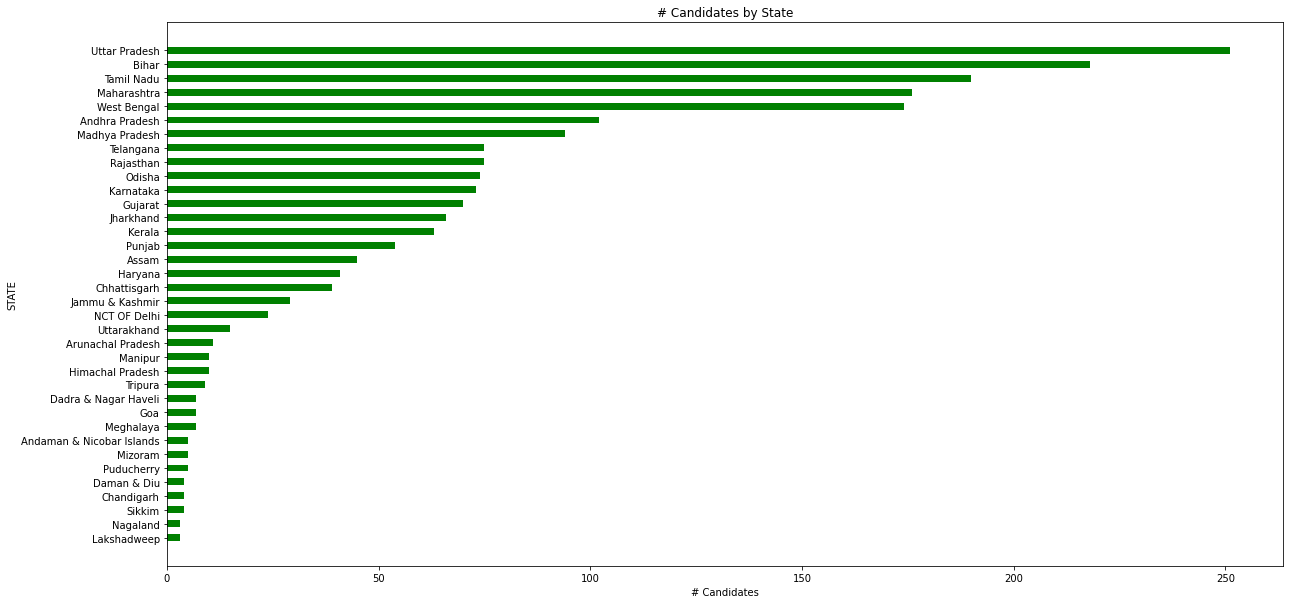

In [96]:
const=pd.DataFrame(df['NAME'].groupby(df['STATE']).nunique()).sort_values(by='NAME',ascending=True)
const['STATE']=const.index
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.barh(y=const['STATE'].to_list(),width=const['NAME'].to_list(),height=0.5,color='green')
plt.title('# Candidates by State')
plt.ylabel('STATE')
plt.xlabel('# Candidates')
plt.show()

<AxesSubplot:ylabel='PARTY'>

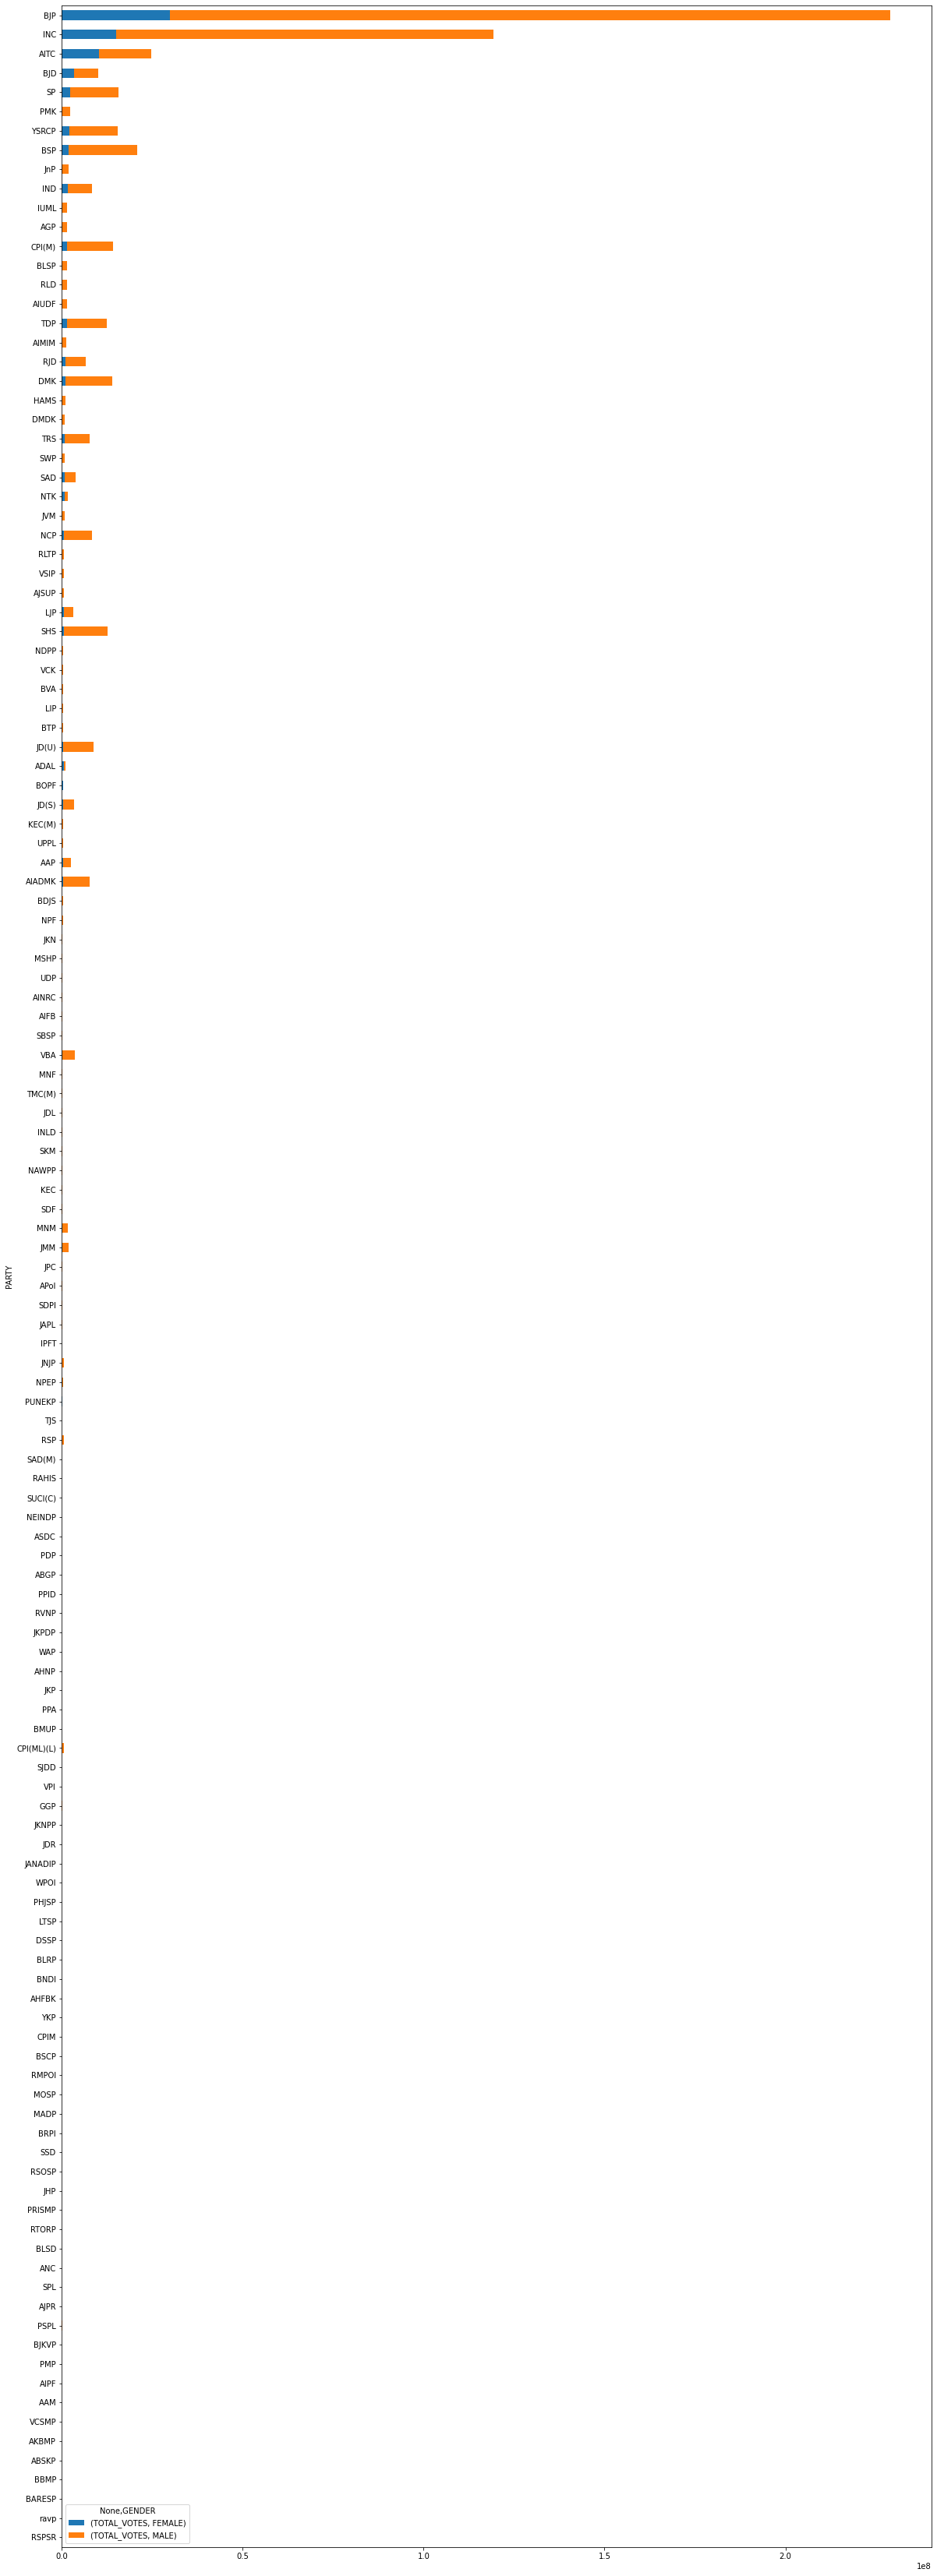

In [112]:
pd.DataFrame(df['TOTAL_VOTES'].groupby([df['PARTY'],df['GENDER']]).sum()).sort_values(by='TOTAL_VOTES',ascending=True).unstack().plot(kind='barh',stacked=True,figsize=(20,60))

In [109]:
for col in df.columns:
    print(col,df[col].nunique())

STATE 36
CONSTITUENCY 539
NAME 2014
WINNER 2
PARTY 133
SYMBOL 126
GENDER 2
CRIMINAL_CASES 28
AGE 60
CATEGORY 3
EDUCATION 13
ASSETS 1980
LIABILITIES 1227
GENERAL_VOTES 2244
POSTAL_VOTES 1217
TOTAL_VOTES 2247
OVER_TOTAL_ELECTORS__IN_CONSTITUENCY 2263
OVER_TOTAL_VOTES_POLLED__IN_CONSTITUENCY 2263
TOTAL_ELECTORS 542


### 1. How many candidates have criminial cases and have won elections? and in which state

### 2. Are there any female candidates with criminal cases ? which state shows this trend

### 3. Which state has most old candidates?

### 4. How many parties are there at National Level? Represent Them on a pie . Slices to be based on # Votes

### 5. Which state has most qualified Candidates?

### 6. Which party has most Gen category candidates?

### 7. Which state has the richest candidates? Which party do they belong to?

### 8. Which consituency was voted with highest NOTA?

### 9. In each state what is the turn-up percentage of voters?

### 10. Which state has the highest #female candidates?

### 11. What is the correlation b/w #candidates and #consituency?

### 12. Is there a scenario where in the states with low population density are using postal votes? Test the hypotheses

### 13. What is the highest difference of votes between loosing and winning candidate?

### 14. What is the lowest difference of votes between loosing and winning candidate?

### 15. Which candidate has the lowest net assets? Which constituecy they belong to?

### 16. What is most wierdest party symbol? Which constituency and in which state is it?

### 17. Which party has only female or only male candidates?

### 18. Which two or more parties have same symbol and what is the symbol?

### 19. Which state has most 18+ voters registered?